In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
import cv2
import matplotlib.pyplot as plt
import glob
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
print('TEST')
# https://colab.research.google.com/drive/12QusaaRj_lUwCGDvQNfICpa7kA7_a2dE#scrollTo=q2Jjv0yRKLPe


Mounted at /content/gdrive
 1.jpg
 8.jpg
'Another Jerusalem Miracle - 26May2022 abridged.docx'
'Colab Notebooks'
 darknet
 Dataset
 Dataset1
 imagepro
 Image_processing
 KT_Colab
'Loss and Redemption - 6 April .docx'
 MR2DX-LegendCup-CDlist-Offset-Calculator.xlsx
'My Drive'
 Sample_YoloV3.zip
 Tensorflow
 Thesis
 train_yolov3_custom.ipynb
 video1624940358.mp4
 Wedding_plan
 week_19video1083996781.mp4
 Weights
TEST


In [ ]:
!pip install minepy
!pip install mine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 496 kB 7.3 MB/s 
  Created wheel for minepy: filename=minepy-1.2.6-cp37-cp37m-linux_x86_64.whl size=177586 sha256=1303408eb33a2b177d25e4f0a606796ccb8c89b85fa998c128377d91e3dd1e5c
  Stored in directory: /root/.cache/pip/wheels/81/71/75/403a33428e468a25c93fa7b672d070b304f36642eb699a29e0
Successfully built minepy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 223 kB 10.9 MB/s 
     |████████████████████████████████| 47 kB 5.5 MB/s 
     |████████████████████████████████| 636 kB 39.2 MB/s 
     |████████████████████████████████| 130 kB 49.2 MB/s 
  Created wheel for crayons: filename=crayons-0.1.2-py3-none-any.whl size=3126 sha256=84f8560ee6b62911a5ff98983129f175df4c46b8213209ee9d416f869712113f
  Stored in directory: /root/.cache/pip/wheels/61/61/a6/05a19534c5fbc

In [ ]:
import os
features_col_name = ["iVecCoun",	
                     "dRadius",	
                     "dCohIndex",	
                     "vardRadius",	
                     "vardCohIndex",	
                     "d_varRad",	
                     "d_varCoh",	
                     "da5Radius_v0",	
                     "da5Radius_v1",	
                     "da5Radius_v2",	
                     "da5Radius_v3",	
                     "da5Radius_v4",	
                     "da5Radius_f0",	
                     "da5Radius_f1",	
                     "da5Radius_f2",	
                     "da5Radius_f3",	
                     "da5Radius_f4",	
                     "da5Radius_%0",	
                     "da5Radius_%1",	
                     "da5Radius_%2",	
                     "da5Radius_%3",	
                     "da5Radius_%4",	
                     "dCos",	
                     "dSin",	
                     "da5Degree_v0",	
                     "da5Degree_v1",	
                     "da5Degree_v2",	
                     "da5Degree_v3",	
                     "da5Degree_v4",	
                     "da5Degree_f0",	
                     "da5Degree_f1",	
                     "da5Degree_f2",	
                     "da5Degree_f3",	
                     "da5Degree_f4",	
                     "da5Degree_%0",	
                     "da5Degree_%1",	
                     "da5Degree_%2",	
                     "da5Degree_%3",	
                     "da5Degree_%4",	
                     "iRGBTotal",	
                     "iRMean",	
                     "iGMean",	
                     "iBMean",	
                     "d_luminance",	
                     "ia5R_v0",	
                     "ia5R_v1",	
                     "ia5R_v2",	
                     "ia5R_v3",	
                     "ia5R_v4",	
                     "ia5R_f0",	
                     "ia5R_f1",	
                     "ia5R_f2",	
                     "ia5R_f3",	
                     "ia5R_f4",	
                     "ia5R_%0",	
                     "ia5R_%1",	
                     "ia5R_%2",	
                     "ia5R_%3",	
                     "ia5R_%4",	
                     "ia5G_v0",	
                     "ia5G_v1",	
                     "ia5G_v2",	
                     "ia5G_v3",	
                     "ia5G_v4",	
                     "ia5G_f0",	
                     "ia5G_f1",	
                     "ia5G_f2",	
                     "ia5G_f3",	
                     "ia5G_f4",	
                     "ia5G_%0",	
                     "ia5G_%1",	
                     "ia5G_%2",	
                     "ia5G_%3",	
                     "ia5G_%4",	
                     "ia5B_v0",	
                     "ia5B_v1",	
                     "ia5B_v2",	
                     "ia5B_v3",
                     "ia5B_v4",	
                     "ia5B_f0",	
                     "ia5B_f1",	
                     "ia5B_f2",	
                     "ia5B_f3",	
                     "ia5B_f4",	
                     "ia5B_%0",	
                     "ia5B_%1",	
                     "ia5B_%2",	
                     "ia5B_%3",	
                     "ia5B_%4"]

In [ ]:
def get_train_data(data):
    train_data = []
    train_label = []
    for k in data:
        for j in data[k]:
          train_data.append(j)
          train_label.append(int(k))
    return train_data, train_label

def get_test_data(data):
    test_data = []
    test_label = []
    for k in data:
        for j in data[k]:
          test_data.append(j)
          test_label.append(int(k))
    return test_data, test_label

def get_Data(dir_name="", remove=list()):
    data={}
    for index,name in enumerate(os.listdir(dir_name)):
        if ".csv" in name:
            with open(dir_name+"/"+name,'r') as f:
                d=f.readline().strip()
                d=f.readline().strip()
                while d:
                    line=d.split()
                    label=line[0]
                    if label not in data:
                        data[label]=[]
                    raw_data=line[1:]
                    raw_data=np.delete(raw_data, remove, axis=0)
                    one_data=[]
                    for i in raw_data:
                        # if not i.replace('.','').isdigit():
                            # i=0
                        one_data.append(float(i))
                    data[label].append(one_data)
                    d=f.readline().strip()
            f.close()
    return data

def count_accuracy(y,pred_y):
    correct = 0.
    for k in range(len(y)):
        if pred_y[k] == y[k]:
            correct += 1
    return correct/len(y)

In [ ]:
# Import your necessary dependencies
# from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_credit


def get_score_features_random_forest_classifier(dir_name, remove):
  data = get_Data(dir_name, remove)
  test_data, test_label = get_test_data(data)
  fit_ranking = []
  # Feature extraction
  """
  Use the Recursive Feature Elimination algorithm in order to fit the data into the classification function 
  and know how many features I need to select so that its accuracy is high. 
  Use Stratified Cross Validation to enhance the accuracy.
  A model can be random forests.
  """
  model = RandomForestClassifier(n_estimators=100,random_state=True,n_jobs=-1)
  rfe = RFE(model)
  fit = rfe.fit(test_data, test_label)
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  # Mapping
  for i in range(len(features_col_name)):
    fit_ranking.append(fit.ranking_[i])
  return fit_ranking


def display_RFE(dir_name, remove):
  data = get_Data(dir_name, remove)
  test_data, test_label = get_test_data(data)
  cv = StratifiedKFold(2)
  visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')
  visualizer.fit(test_data, test_label)        # Fit the data to the visualizer
  visualizer.show()           # Finalize and render the figure
  return




In [ ]:
# Code from Second MIC
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from minepy import MINE

def get_score_features(dir_name, remove, mic_threshold):
  good_features = []
  print("dir_name:", dir_name)
  tolal_features = 89 - len(remove)
  data = get_Data(dir_name, remove)
  print(data)
  print(data["0"])
  print(data["1"])
  d0=np.transpose(data["0"]) # transpose the matrix that each row stand for each feature
  d1=np.transpose(data["1"])
  print(data)
  mine = MINE(alpha=0.6, c=15)
  mic_matrix = np.zeros(tolal_features)
  print(mic_matrix)
  for i in range(tolal_features):
    c=list(d0[i])+list(d1[i])
    d=[0.]*len(d0[i])+[1.]*len(d1[i])
    mine.compute_score(c, d) # computer the mic between feature and label
    # mic_matrix[i] = mine.mic()
    # print(mine.mic())
    # print(mine.get_score())
    mic_matrix[i] = mine.mic()
    if mic_matrix[i] > mic_threshold and i not in remove:
      good_features.append(mic_matrix[i])
  print("good_features", good_features)
  print("len(good_features)", len(good_features))
  print("finish.")
  return good_features


In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np

# All attributes
rf_ref = []
mic = []
path_datasets = "Datasets"
rf_ref = get_score_features_random_forest_classifier("/content/gdrive/MyDrive/Tensorflow/second/" + path_datasets, [])
mic = get_score_features("/content/gdrive/MyDrive/Tensorflow/second/" + path_datasets, [], 0.0)

Num Features: 44
Selected Features: [False  True  True  True False False False  True False False False False
  True  True  True False False False False False False False  True False
 False False False False False  True  True  True  True  True False False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True False False  True  True False False False  True
  True  True False False  True False False False  True  True  True False
 False False  True  True  True  True False  True  True  True  True  True
  True False False False False]
Feature Ranking: [ 2  1  1  1 10 19 11  1 41 46 45 42  1  1  1  7 34 40 14 35 37 44  1  4
 32 21 30 24 33  1  1  1  1  1 26 12 23 22 13  1  1  1  8  1  1  1  1  1
  1  1  1  1 28 20  1  1 18 29 17  1  1  1 15 25  1  5 16  9  1  1  1 39
 43 36  1  1  1  1  3  1  1  1  1  1  1 31 38  6 27]
dir_name: /content/gdrive/MyDrive/Tensorflow/second/Datasets


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



good_features [0.3549637213492987, 0.2702273543085934, 0.23332926652003538, 0.4147894217330928, 0.34986338269366096, 0.19531626094911939, 0.246280632859931, 0.08371884751400417, 0.08105353894602596, 0.050637107558959886, 0.027107875452749793, 0.06647693043672845, 0.4004440119877986, 0.43148584774458465, 0.36434058791994883, 0.24777851918202173, 0.19153415741930538, 0.18490940369053238, 0.20491502168020026, 0.18037619975524086, 0.11574061911356001, 0.14727748430531773, 0.46206936868122667, 0.22868999270237148, 0.37070467944877095, 0.3185353081664758, 0.29544354021552816, 0.28217551459250423, 0.26418096361372845, 0.29564134741434983, 0.3263310686593797, 0.33846106724862524, 0.3431299378256005, 0.34160994075395773, 0.14774568960580267, 0.14240917688414415, 0.1305593556517423, 0.1310084452386655, 0.1424417108419668, 0.3549637213492987, 0.26356112862440206, 0.21126272582209085, 0.39527216648544833, 0.32784598534953335, 0.42830250980399326, 0.5102763639374049, 0.37233727232520736, 0.35887234

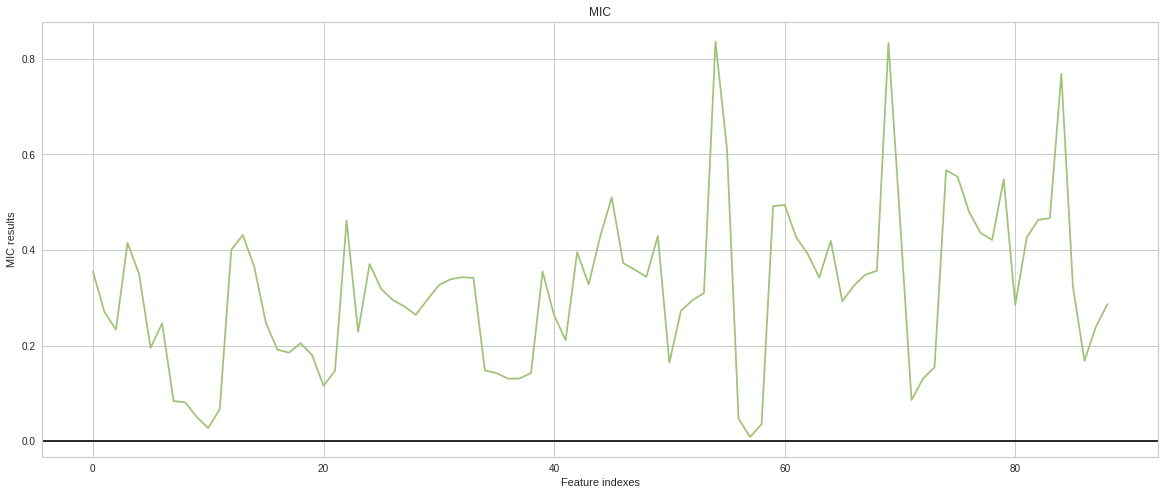

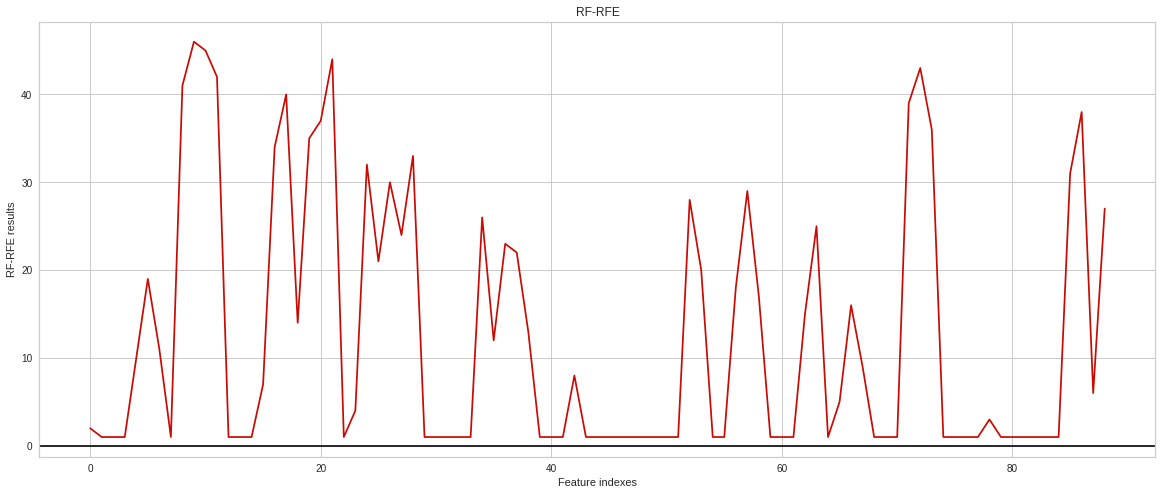

In [ ]:
import numpy as np
import matplotlib.pyplot as plot

# Get x values of the sine wave
plot.figure(figsize = (20, 8))

# data to be plotted
x = np.arange(0, len(mic))
y = mic

# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(x, y, color='g')

# Give a title for the sine wave plot
plot.title('MIC')

# Give x axis label for the sine wave plot
plot.xlabel('Feature indexes')

# Give y axis label for the sine wave plot
plot.ylabel('MIC results')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()


plot.figure(figsize = (20, 8))
# data to be plotted
x = np.arange(0, len(rf_ref))
y = rf_ref

# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(x, y, color='r')

# Give a title for the sine wave plot
plot.title('RF-RFE')

# Give x axis label for the sine wave plot
plot.xlabel('Feature indexes')

# Give y axis label for the sine wave plot
plot.ylabel('RF-RFE results')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()

In [ ]:
# Decision
# creating a DataFrame
# Grouping.
dict = {'Features_col_name' : features_col_name,
        'RFE' : rf_ref,
        'MIC' : mic,
}
df = pd.DataFrame(dict)

display(df.groupby("RFE"))
filtered_df = df
display(filtered_df)

,Features_col_name,RFE,MIC
0,iVecCoun,2,0.354964
1,dRadius,1,0.270227
2,dCohIndex,1,0.233329
3,vardRadius,1,0.414789
4,vardCohIndex,10,0.349863
...,...,...,...
84,ia5B_%0,1,0.768841
85,ia5B_%1,31,0.324421
86,ia5B_%2,38,0.167872
87,ia5B_%3,6,0.239243


In [ ]:
# motion_model_random_forest = train_random_forest_fire('Datasets', [])
# test_random_forest_fire(motion_model_random_forest, [])
def generate_remove_array(remove_list):
  all_features = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11,	12,	13,	14,	15,	16,	17,	18,	19,	20,
    21, 22, 23, 24,	25,	26,	27,	28,	29,	30,
    31,	32,	33,	34,	35,	36,	37,	38,	39,	40,
    41,	42, 43,	44,	45,	46,	47,	48,	49,	50,
    51,	52,	53,	54,	55,	56,	57,	58,	59,	60,
    61,	62,	63,	64,	65,	66,	67,	68,	69,	70,
    71,	72,	73, 74, 75, 76, 77, 78, 79, 80,
    81, 82, 83, 84, 85, 86, 87, 88]
  for ele in remove_list:
    all_features.remove(ele)
  return all_features


selected_features_motion = []
selected_features_luminance = []
selected_features_colours_R = []
selected_features_colours_G = []
selected_features_colours_B = []

# Motion
motions_df = filtered_df[filtered_df.Features_col_name.isin([
  "iVecCoun", "dRadius", "dCohIndex", "vardRadius", "vardCohIndex", "dCos", "dSin"])]
display(motions_df)
print('selected features', motions_df.index)
selected_features_motion = motions_df.index.values

# Luminance
luminance_df = filtered_df[filtered_df.Features_col_name.isin(["d_luminance"])]
display(luminance_df)
print('selected features', luminance_df.index)
selected_features_luminance = luminance_df.index.values

# Colours_R
colours_R_df = filtered_df[filtered_df.Features_col_name.isin([
            "ia5R_v0", "ia5R_v1", "ia5R_v2", "ia5R_v3", "ia5R_v4",
            "ia5R_f0", "ia5R_f1", "ia5R_f2", "ia5R_f3", "ia5R_f4"
            ])]
display(colours_R_df)
print('selected features', colours_R_df.index)
selected_features_colours_R = colours_R_df.index.values

# Colours_G
colours_G_df = filtered_df[filtered_df.Features_col_name.isin([
            "ia5G_v0", "ia5G_v1", "ia5G_v2", "ia5G_v3", "ia5G_v4",
            "ia5G_f0", "ia5G_f1", "ia5G_f2", "ia5G_f3", "ia5G_f4",
            ])]
display(colours_G_df)
print('selected features', colours_G_df.index)
selected_features_colours_G = colours_G_df.index.values

# Colours_B
colours_B_df = filtered_df[filtered_df.Features_col_name.isin([
            "ia5B_v0", "ia5B_v1", "ia5B_v2", "ia5B_v3", "ia5B_v4",
            "ia5B_f0", "ia5B_f1", "ia5B_f2", "ia5B_f3", "ia5B_f4",
            ])]
display(colours_B_df)
print('selected features', colours_B_df.index)
selected_features_colours_B = colours_B_df.index.values

,Features_col_name,RFE,MIC
0,iVecCoun,2,0.354964
1,dRadius,1,0.270227
2,dCohIndex,1,0.233329
3,vardRadius,1,0.414789
4,vardCohIndex,10,0.349863
22,dCos,1,0.462069
23,dSin,4,0.228690


selected features Int64Index([0, 1, 2, 3, 4, 22, 23], dtype='int64')


,Features_col_name,RFE,MIC
43,d_luminance,1,0.327846


selected features Int64Index([43], dtype='int64')


,Features_col_name,RFE,MIC
44,ia5R_v0,1,0.428303
45,ia5R_v1,1,0.510276
46,ia5R_v2,1,0.372337
47,ia5R_v3,1,0.358872
48,ia5R_v4,1,0.343491
49,ia5R_f0,1,0.429367
50,ia5R_f1,1,0.164070
51,ia5R_f2,1,0.272538
52,ia5R_f3,28,0.294871
53,ia5R_f4,20,0.310010


selected features Int64Index([44, 45, 46, 47, 48, 49, 50, 51, 52, 53], dtype='int64')


,Features_col_name,RFE,MIC
59,ia5G_v0,1,0.492006
60,ia5G_v1,1,0.494298
61,ia5G_v2,1,0.426621
62,ia5G_v3,15,0.392044
63,ia5G_v4,25,0.342205
64,ia5G_f0,1,0.419424
65,ia5G_f1,5,0.292609
66,ia5G_f2,16,0.325193
67,ia5G_f3,9,0.348470
68,ia5G_f4,1,0.356487


selected features Int64Index([59, 60, 61, 62, 63, 64, 65, 66, 67, 68], dtype='int64')


,Features_col_name,RFE,MIC
74,ia5B_v0,1,0.567178
75,ia5B_v1,1,0.553609
76,ia5B_v2,1,0.479720
77,ia5B_v3,1,0.435690
78,ia5B_v4,3,0.421012
79,ia5B_f0,1,0.548251
80,ia5B_f1,1,0.284560
81,ia5B_f2,1,0.426459
82,ia5B_f3,1,0.463342
83,ia5B_f4,1,0.466579


selected features Int64Index([74, 75, 76, 77, 78, 79, 80, 81, 82, 83], dtype='int64')


In [ ]:
import os

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f
path_datasets = "Datasets_4_stages"
def train_random_forest_fire(remove):
    data_train = get_Data(dir_name="/content/gdrive/MyDrive/Tensorflow/second/" + path_datasets, remove=remove)
    train_data, train_label = get_train_data(data_train)
    random_forest_model = RandomForestClassifier(
        n_jobs=-1, max_depth=11, 
        n_estimators=50, min_samples_leaf=1)
    # Split train and test
    random_forest_model.fit(train_data, train_label)
    return random_forest_model


def generate_remove_array(remove_list):
  all_features = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11,	12,	13,	14,	15,	16,	17,	18,	19,	20,
    21, 22, 23, 24,	25,	26,	27,	28,	29,	30,
    31,	32,	33,	34,	35,	36,	37,	38,	39,	40,
    41,	42, 43,	44,	45,	46,	47,	48,	49,	50,
    51,	52,	53,	54,	55,	56,	57,	58,	59,	60,
    61,	62,	63,	64,	65,	66,	67,	68,	69,	70,
    71,	72,	73, 74, 75, 76, 77, 78, 79, 80,
    81, 82, 83, 84, 85, 86, 87, 88]
  for ele in remove_list:
    all_features.remove(ele)
  return all_features

# Use Remove to split up motion, luminance, and RGB
# Get attributes for motion by removing others attribute.
# Motion attributes 0,	1,	2,	3,	4, 22,	23

"""
remove_not_motion = [
                    5, 6,	7,	8,	9,	10,
          11,	12,	13,	14,	15,	16,	17,	18,	19,	20,
          21, 24,	25,	26,	27,	28,	29,	30,
          31,	32,	33,	34,	35,	36,	37,	38,	39,	40,
          41,	42, 43,	44,	45,	46,	47,	48,	49,	50,
          51,	52,	53,	54,	55,	56,	57,	58,	59,	60,
          61,	62,	63,	64,	65,	66,	67,	68,	69,	70,
          71,	72,	73, 74, 75, 76, 77, 78, 79, 80,
          81, 82, 83, 84, 85, 86, 87, 88]
"""

remove_not_motion = generate_remove_array(selected_features_motion)
print(remove_not_motion)
motion_model_random_forest = train_random_forest_fire(remove_not_motion)
print("Training done!")


[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
Training done!


In [ ]:
from tabulate import tabulate
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def is_fire(model, remove, name="", footage_name=''):
    # SB_Vt = "SB_19_Vt_0.1"
    # Comparison purple fire and smoke.
    # data_test_fire = get_Data(dir_name="/content/gdrive/MyDrive/Tensorflow/second/Dataset_test_fire_" + SB_Vt, remove=remove)
    # data_test_fire = get_Data(dir_name="/content/gdrive/MyDrive/Tensorflow/second/Dataset_test_not_fire_" + SB_Vt, remove=remove)
    data_test_fire = get_Data(dir_name="/content/gdrive/MyDrive/Tensorflow/second/Test_datasets/" + footage_name, remove=remove)
    test_data, test_label = get_test_data(data_test_fire)
    Y_prediction = model.predict(test_data)
    print(Y_prediction)
    # isFire = True if ((100 * np.count_nonzero(Y_prediction == 1) / len(Y_prediction)) > threshold) else False
    percentage_no_fire = (100 * np.count_nonzero(Y_prediction == 0) / len(Y_prediction))
    percentage_fire = (100 * np.count_nonzero(Y_prediction == 1) / len(Y_prediction))
    percentage_fire_more_smoke = (100 * np.count_nonzero(Y_prediction == 2) / len(Y_prediction))
    percentage_smoke_more_fire = (100 * np.count_nonzero(Y_prediction == 3) / len(Y_prediction))
    percentage_smoke = (100 * np.count_nonzero(Y_prediction == 4) / len(Y_prediction))

    df = pd.DataFrame({
       footage_name : [str(percentage_no_fire) + " %",
               str(percentage_fire) + " %",
               str(percentage_fire_more_smoke) + " %",
               str(percentage_smoke_more_fire) + " %",
               str(percentage_smoke) + " %"
               ],
    })
    print(tabulate(df, headers='keys', tablefmt='psql'))
    return percentage_no_fire, percentage_fire, percentage_fire_more_smoke, percentage_smoke_more_fire, percentage_smoke;

def print_report(nameOfReport, motion_model, remove_not_motion):
  print(nameOfReport)
  percentage_no_fire015, percentage_fire015, percentage_fire_more_smoke015, percentage_smoke_more_fire015, percentage_smoke015 = is_fire(motion_model, remove_not_motion, "Motion", "footage01-015")
  percentage_no_fire010, percentage_fire010, percentage_fire_more_smoke010, percentage_smoke_more_fire010, percentage_smoke010 = is_fire(motion_model, remove_not_motion, "Motion", "footage01-010")
  percentage_no_fire023, percentage_fire023, percentage_fire_more_smoke023, percentage_smoke_more_fire023, percentage_smoke023 = is_fire(motion_model, remove_not_motion, "Motion", "footage02-023")
  percentage_no_fire006, percentage_fire006, percentage_fire_more_smoke006, percentage_smoke_more_fire006, percentage_smoke006 = is_fire(motion_model, remove_not_motion, "Motion", "footage02-006")
  percentage_no_fire008, percentage_fire008, percentage_fire_more_smoke008, percentage_smoke_more_fire008, percentage_smoke008 = is_fire(motion_model, remove_not_motion, "Motion", "footage00-008")
  percentage_no_fire001, percentage_fire001, percentage_fire_more_smoke001, percentage_smoke_more_fire001, percentage_smoke001 = is_fire(motion_model, remove_not_motion, "Motion", "footage00-001")
  print("")

In [22]:
# 1
# motion = []
# print_report("Random forest",
#              motion_model_random_forest,
#              remove_not_motion)
percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage00-001")
percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage00-003")
percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage00-004")
percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage00-008")
footages = ['f00-001', 'f00-003', 'f00-004', 'f00-008']
results = [  [percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1],
           [percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2],
           [percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3],
          [percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4],]


[1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1]
+----+----------------------+
|    | footage00-001        |
|----+----------------------|
|  0 | 96.90402476780186 %  |
|  1 | 3.0959752321981426 % |
|  2 | 0.0 %                |
|  3 | 0.0 %                |
|  4 | 0.0 %                |
+----+----------------------+
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [24]:
# 2
percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage01-005")
percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage01-009-004")
percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage01-010")
percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage01-014")

footages = ['f01-005', 'f01-009-001', 'f01-010', 'f01-014']
results = [  [percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1],
           [percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2],
           [percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3],
          [percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4],
        ]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
+----+----------------------+
|    | footage01-005        |
|----+----------------------|
|  0 | 0.0 %                |
|  1 | 99.37888198757764 %  |
|  2 | 0.0 %                |
|  3 | 0.6211180124223602 % |
|  4 | 0.0 %                |
+----+----------------------+
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [26]:
# 3
percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage01-015")
percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage01-025")
percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-001")
percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-006")

footages = ['f01-015', 'f01-025', 'f02-001', 'f02-006']
results = [  [percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1],
           [percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2],
           [percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3],
          [percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4],
        ]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
+----+----------------------+
|    | footage01-015        |
|----+----------------------|
|  0 | 0.0 %                |
|  1 | 99.50248756218906 %  |
|  2 | 0.0 %                |
|  3 | 0.4975124378109453 % |
|  4 | 0.0 %                |
+----+----------------------+
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

In [28]:
# 4
percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-007")
percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-008")
percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-009")
percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-016")

footages = ['f02-007', 'f02-008', 'f02-009', 'f02-016']
results = [  [percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1],
           [percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2],
           [percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3],
          [percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4],
        ]

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
+----+-----------------+
|    | footage02-007   |
|----+-----------------|
|  0 | 0.0 %           |
|  1 | 0.0 %           |
|  2 | 0.0 %           |
|  3 | 0.0 %           |
|  4 | 100.0 %         |
+----+-----------------+
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [30]:
# 5
percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-019")
percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-023")
percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-026")
percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "footage02-28")

footages = ['f02-019', 'f02-023', 'f02-026', 'f02-28']
results = [  [percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1],
           [percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2],
           [percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3],
          [percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4],
        ]

[1 4 4 4 4 4 4 4 3 2 4 3 4 4 3 3 3 3 3 3 4 3 3 4 3 3 3 3 3 3 3 4 3 3 3 3 3
 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
+----+-----------------------+
|    | footage02-019         |
|----+-----------------------|
|  0 | 0.0 %                 |
|  1 | 0.49504950495049505 % |
|  2 | 1.9801980198019802 %  |
|  3 | 88.61386138613861 %   |
|  4 | 8.910891089108912 %   |
+----+-----------------------+
[2 4 4 4 3 2 4 1 3 3 3 1 4 1 3 3 3 3 4 3 1 3 4 1 1 3 4 4 2 1 4 3 3 4 1 4 4
 1 1 1 4 2 3 4 4 4 4 1 1 3 1 1 4 2 1 4 3 4 1 1 4 4 2 4 4 4 4 4 2 4 4 4 4 4
 3 3 4 4 4 4 3 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 1 4 4 4
 4 4 2 4 4 1 1 3 1 4 1 4 4 1 4 3 1 3 1 4 2 3 3 3 3 4 3 3 2 3 4 3 4 3 4 3 1
 4 3 4 4 3

In [32]:
# 6
percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "UL_natural_fire")
percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "room_1700")
percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "room_3500")
percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4 = is_fire(motion_model_random_forest, remove_not_motion, "Motion", "room_4500")

footages = ['fUL-nature', 'froom-1700', 'froom-3500', 'froom-4500']
results = [  [percentage_no_fire1, percentage_fire1, percentage_fire_more_smoke1, percentage_smoke_more_fire1, percentage_smoke1],
           [percentage_no_fire2, percentage_fire2, percentage_fire_more_smoke2, percentage_smoke_more_fire2, percentage_smoke2],
           [percentage_no_fire3, percentage_fire3, percentage_fire_more_smoke3, percentage_smoke_more_fire3, percentage_smoke3],
          [percentage_no_fire4, percentage_fire4, percentage_fire_more_smoke4, percentage_smoke_more_fire4, percentage_smoke4],
        ]

[2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 1 1 1 1 2 2 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1]
+----+----------------------+
|    | UL_natural_fire      |
|----+----------------------|
|  0 | 0.0 %                |
|  1 | 89.86486486486487 %  |
|  2 | 9.45945945945946 %   |
|  3 | 0.0 %                |
|  4 | 0.6756756756756757 % |
+----+----------------------+
[2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2
 1 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 2 2 2 2 4 1 1 2 2 2 2 2 2 1 2 4 2 2 2 2 2 2 2 2 1 2 2 2 2 2 4 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


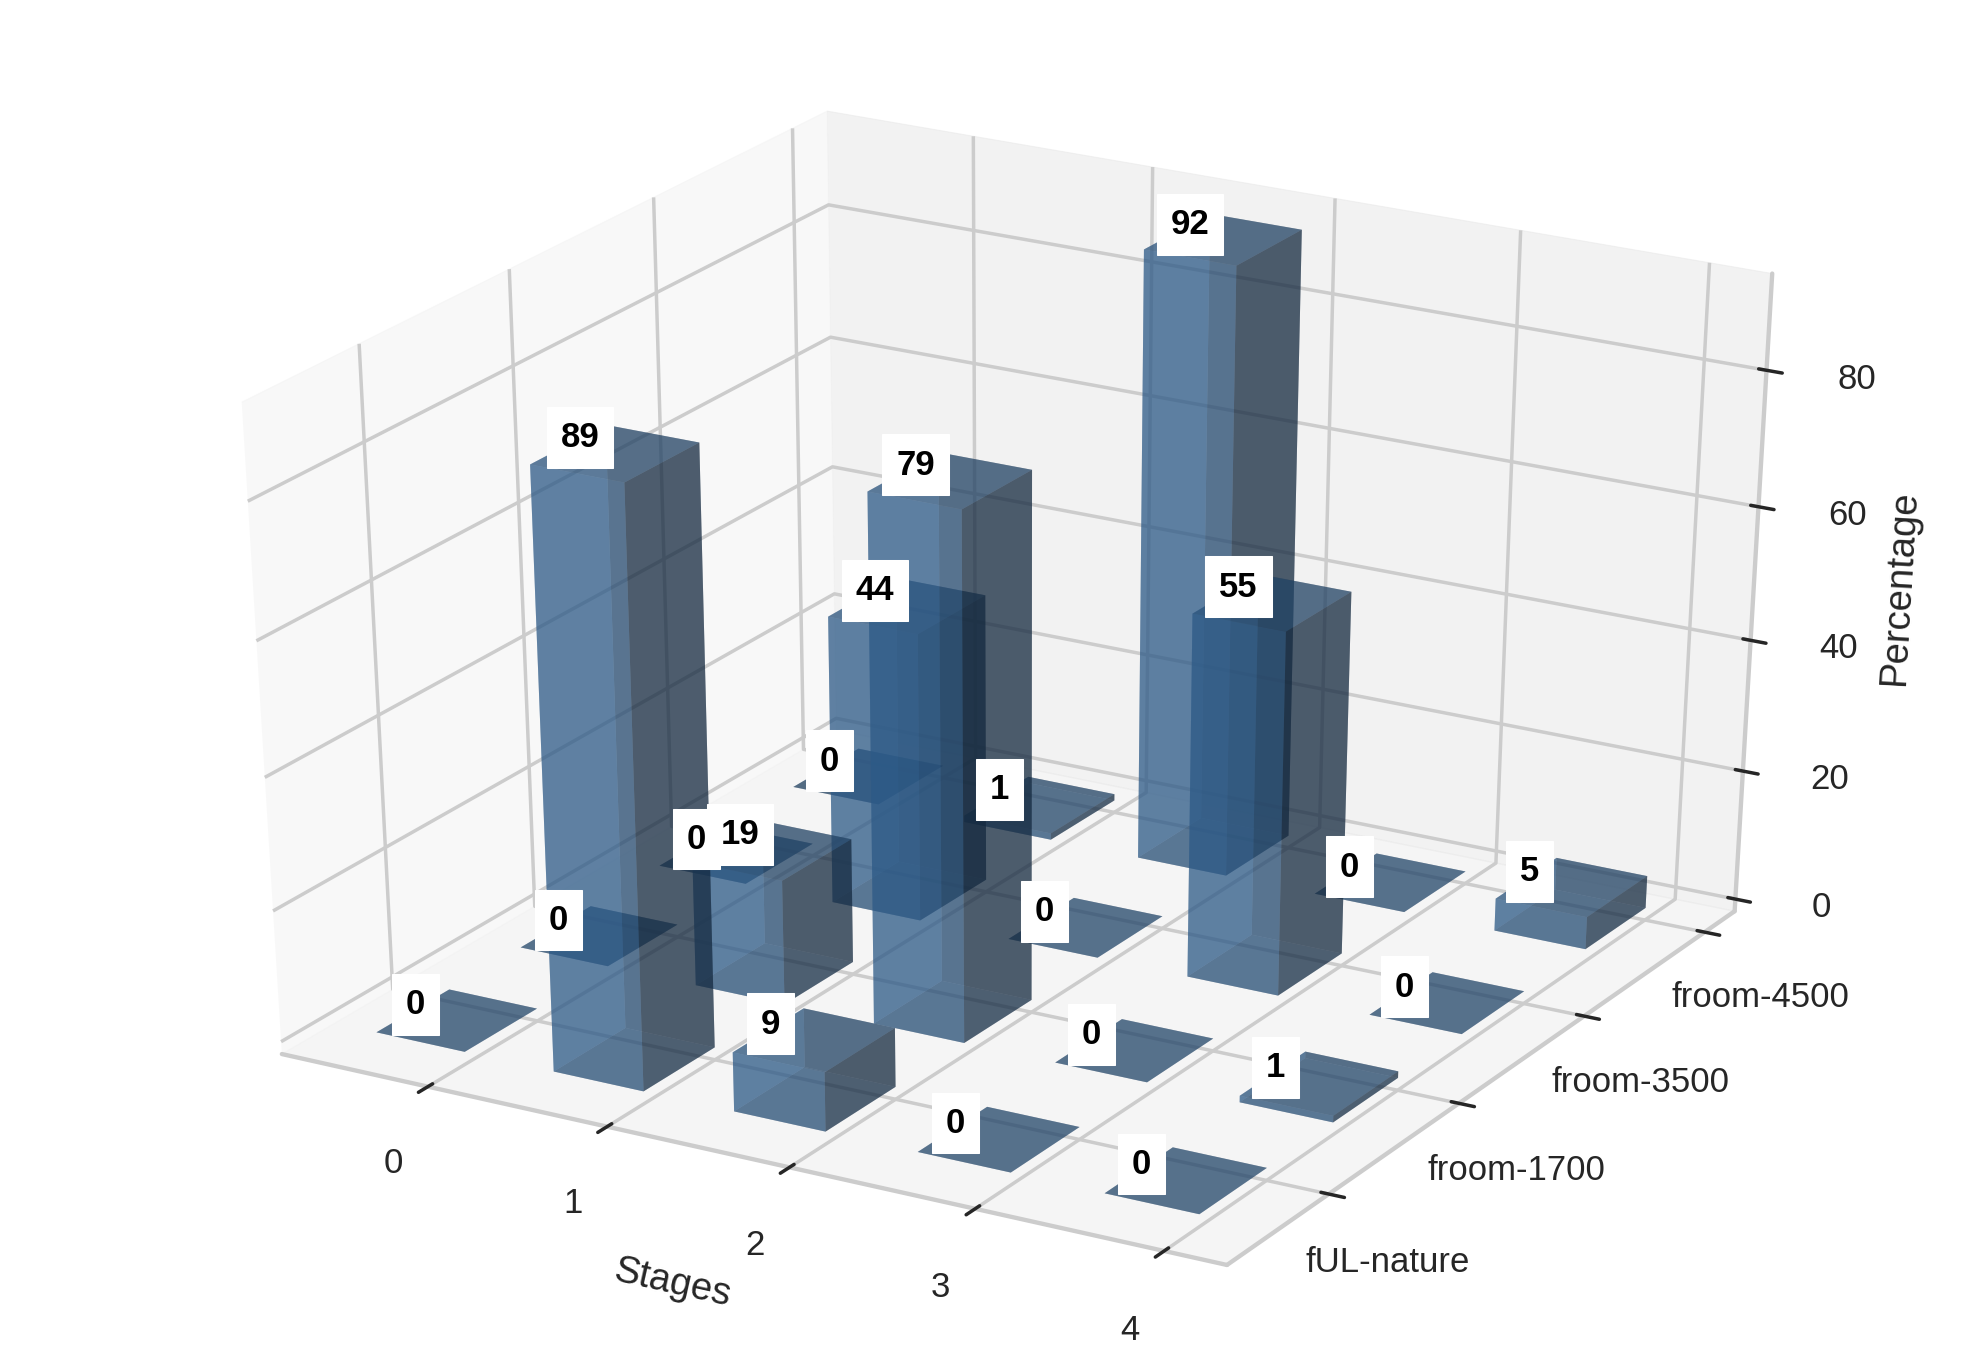

In [33]:
# Draw 3D graph / Add text at the top.
import numpy as np
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

result= results

result = np.array(result, dtype=np.int)
fig=plt.figure(figsize=(10, 7), dpi=250)
colors = ['r','b','g','y','b','p']
ax1=fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Stages', labelpad=10)
ax1.set_ylabel('', labelpad=10)
ax1.set_zlabel('Percentage')
xlabels = np.array(['0', '1', '2','3', '4'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(footages)
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

for x in range(0,len(result)):
  for y in range(0,len(result[x])):
    ax1.text(y, x + 0.2, result[x][y] + 0.2, str(result[x][y]), color='#000000', backgroundcolor= '#ffffff', weight= 'bold')

ax1.w_xaxis.set_ticks(xpos + dx)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy)
ax1.w_yaxis.set_ticklabels(ylabels)

values = np.linspace(0.2, 1., xposM.ravel().shape[0])
# colors = cm.rainbow(values)
colors=(0.2, 0.4, 0.6, 0.5)

ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


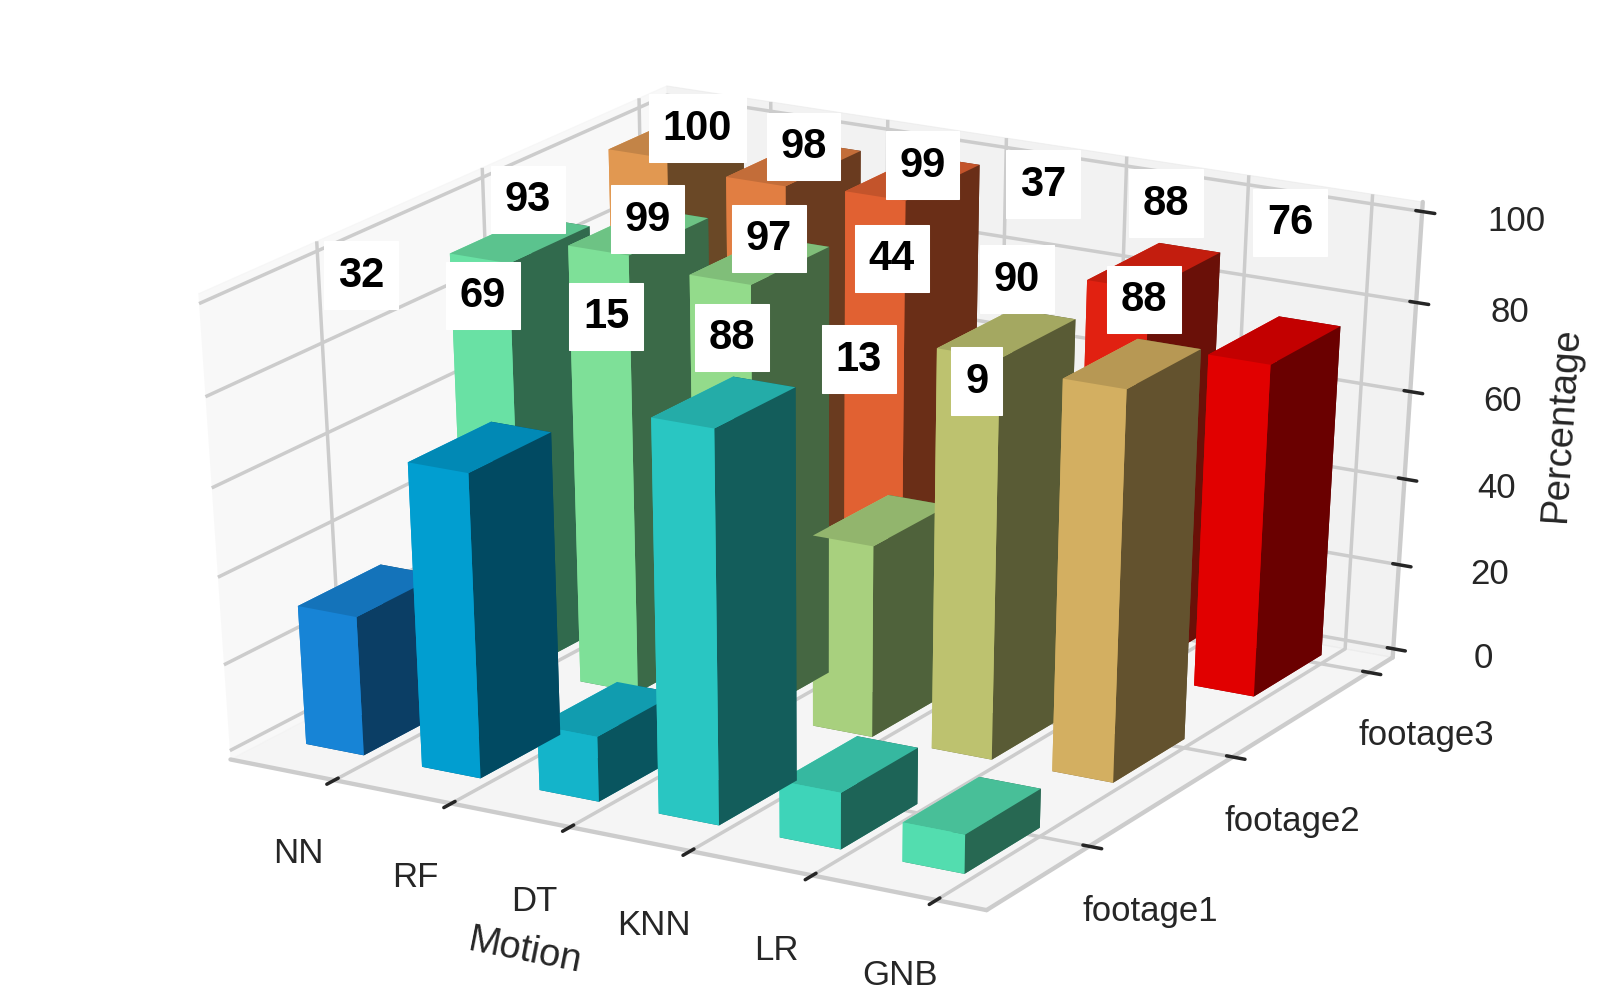

In [ ]:
# Draw 3D graph
import numpy as np
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
# https://stackoverflow.com/questions/71856664/how-do-i-make-the-text-appear-after-3barplot-in-matplotlib
# https://stackoverflow.com/questions/29328089/how-to-put-text-in-matplotlib-3d-bar-graph-at-the-top

result=[['32', '69', '15', '88', '13', '9'],
        ['93', '99', '97', '44', '90', '88'],
        ['100', '98', '99', '37', '88', '76'],
        ]

result = np.array(result, dtype=np.int)
fig=plt.figure(figsize=(8, 5), dpi=250)
colors = ['r','b','g','y','b','p']
ax1=fig.add_subplot(111, projection='3d')
ax1.set_xlabel('Motion', labelpad=10)
ax1.set_ylabel('', labelpad=10)
ax1.set_zlabel('Percentage')
xlabels = np.array(['NN', 'RF', 'DT','KNN', 'LR', 'GNB'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['footage1', 'footage2', 'footage3'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

for x in range(0,len(result)):
  for y in range(0,len(result[x])):
    ax1.text(y + 0.2, x + 0.2, 100, str(result[x][y]), color='#000000', backgroundcolor= '#ffffff', weight= 'bold')

ax1.w_xaxis.set_ticks(xpos + dx)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy)
ax1.w_yaxis.set_ticklabels(ylabels)

values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
plt.show()

TypeError: ignored

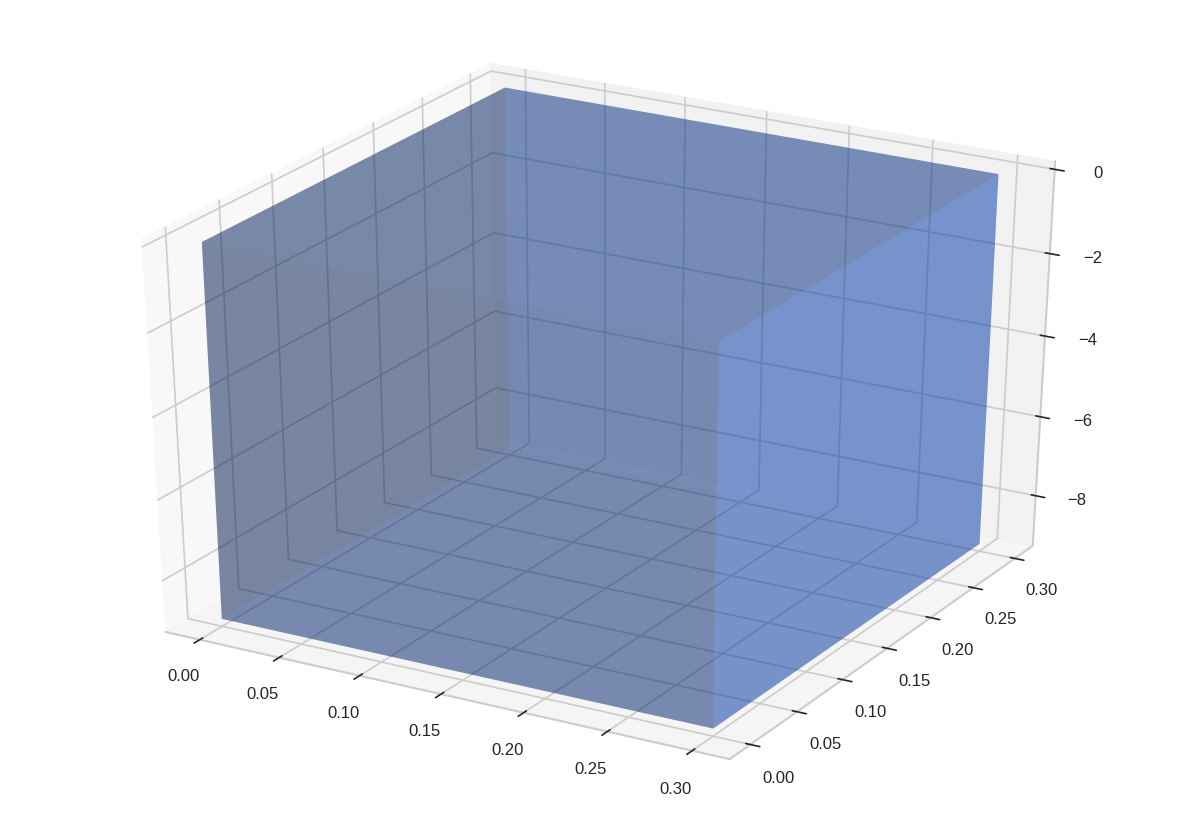

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Percentage_Differences_1 = np.array([ [7.94*(10**-10),7.94*(10**-9),7.94*(10**-8),7.94*(10**-7),7.94*(10**-6),7.94*(10**-5)],
                                [7.92*(10**-12),7.92*(10**-11),7.92*(10**-10),7.92*(10**-9),7.92*(10**-8),7.92*(10**-7)],
                                [7.72*(10**-14),7.72*(10**-13),7.72*(10**-12),7.72*(10**-11),7.72*(10**-10),7.72*(10**-9)],
                                [5.66*(10**-16),5.66*(10**-15),5.66*(10**-14),5.66*(10**-13),5.66*(10**-12),5.66*(10**-11)],
                                [1.49*(10**-17),1.49*(10**-16),1.49*(10**-15),1.49*(10**-14),1.49*(10**-13),1.49*(10**-12)],
                                [2.21*(10**-18),2.21*(10**-17),2.21*(10**-16),2.21*(10**-15),2.21*(10**-14),2.21*(10**-13)] ]) # Layer 1, 12

fig1 = plt.figure(dpi = 120, tight_layout = True)
fig1.set_size_inches(10, 7)

ax1 = fig1.add_subplot(111, projection='3d')

width = depth = 0.3

column_names = ['$10^{-6} m$','$10^{-5} m$','$10^{-4} m$','$10^{-3} m$','$10^{-2} m$','$10^{-1} m$']
row_names = ['$10^{-6} g$','$10^{-5} g$','$10^{-4} g$','$10^{-3} g$','$10^{-2} g$','$10^{-1} g$']
height_names = ['$10^{-2}$','$10^{-4}$','$10^{-6}$','$10^{-8}$','$10^{-10}$','$10^{-12}$','$10^{-14}$','$10^{-16}$','$10^{-18}$']

for x in range(0,6):
    for y in range(0,6):
        plot1 = ax1.bar3d(x, y, 0, width, depth, np.log10(Percentage_Differences_1[x][y]), color = "#0040bf", alpha=0.3, zorder = 1)
        txt1 = ax1.text(x,y,1.15*np.log10(Percentage_Differences_1[x][y]),'{:.2e}'.format(Percentage_Differences_1[y][x]), verticalalignment='top', bbox=dict(facecolor='grey', alpha=0.5), zorder = 2)
        
ax1.view_init(-140, -30)

ax1.set_xticks(np.linspace(0, 6, num = 6))
ax1.set_yticks(np.linspace(0, 6, num = 6))
ax1.set_xticklabels(column_names)
ax1.set_yticklabels(row_names)
ax1.set_zticklabels(height_names)
ax1.set_xlabel("Mass", labelpad = 13, rotation = 45)
ax1.set_ylabel("Radius", labelpad = 10, rotation = 45)
ax1.set_zlabel("Deviation $\Delta$")
ax1.set_title("1st Initial Condition: $r(0)$ and $r'(0)$ of $\Theta(12) = 2.18 \\times 10^{7} m$", pad = 40)

plt.show()